In [1]:
import scanpy as sc

samples = ["bone_marrow", "lung", "spleen"]

adatas = []
for sample in samples:
    tmp = sc.read_10x_mtx(f"../GSE217328_RAW/{sample}")
    tmp.obs["tissue"] = sample
    tmp.obs_names = [f"{sample}_{x}" for x in tmp.obs_names]
    adatas.append(tmp)
adata = sc.concat(adatas)
adata.layers["counts"] = adata.X.copy()
adata

/opt/homebrew/Caskroom/miniforge/base/envs/dandelion/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/dandelion/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/dandelion/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/dandelion/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/opt/homebrew/Caskroom/miniforge/b

AnnData object with n_obs × n_vars = 12135 × 31055
    obs: 'tissue'
    layers: 'counts'

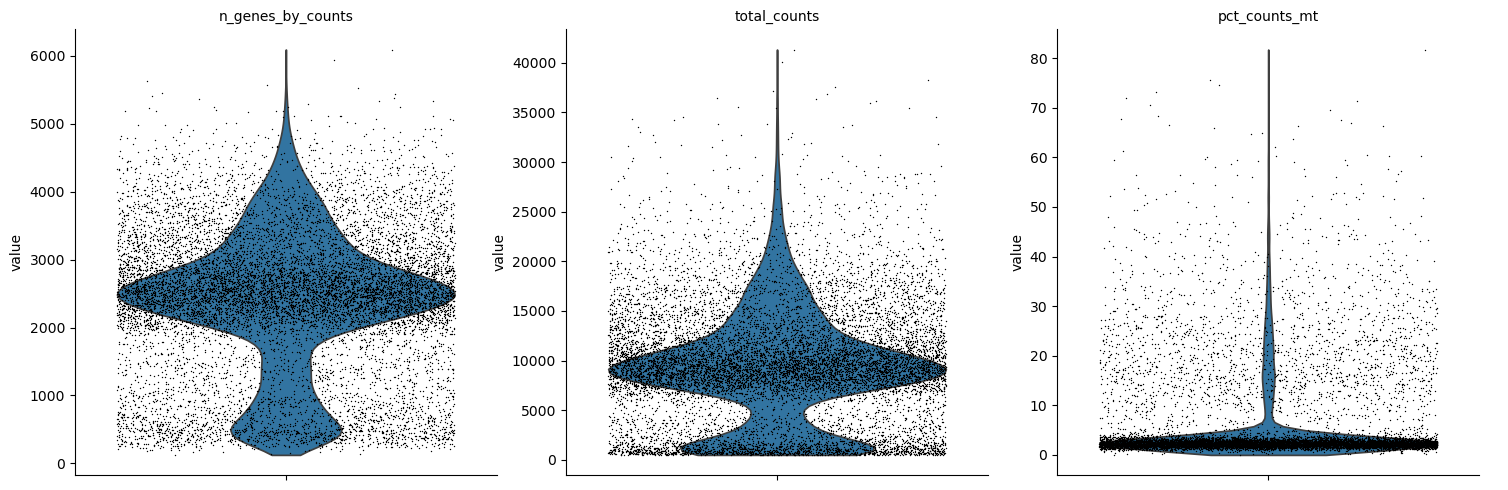

In [2]:
# annotate the group of mitochondrial genes as "mt"
adata.var["mt"] = adata.var_names.str.startswith("mt-")
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt"], percent_top=None, log1p=False, inplace=True
)
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


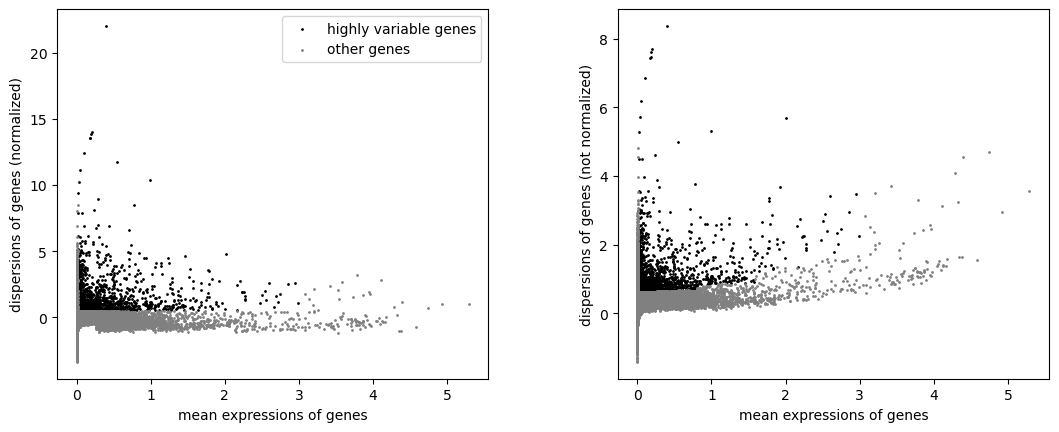

In [3]:
sc.pp.filter_cells(adata, min_genes=50)
adata = adata[adata.obs.pct_counts_mt < 10, :].copy()
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)

adata.raw = adata.copy()

In [4]:
adata = adata[:, adata.var.highly_variable].copy()
adata

AnnData object with n_obs × n_vars = 10253 × 1938
    obs: 'tissue', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'
    layers: 'counts'

In [5]:
sc.pp.regress_out(adata, ["total_counts", "pct_counts_mt"])

In [6]:
sc.pp.scale(adata, max_value=10)

In [7]:
sc.tl.pca(adata, svd_solver="arpack")
sc.external.pp.harmony_integrate(adata, key="tissue")

2025-07-17 10:57:26,430 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-07-17 10:57:31,324 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-07-17 10:57:31,348 - harmonypy - INFO - Iteration 1 of 10
2025-07-17 10:57:32,263 - harmonypy - INFO - Iteration 2 of 10
2025-07-17 10:57:33,074 - harmonypy - INFO - Converged after 2 iterations


In [8]:
sc.pp.neighbors(adata, use_rep="X_pca_harmony")
sc.tl.umap(adata)

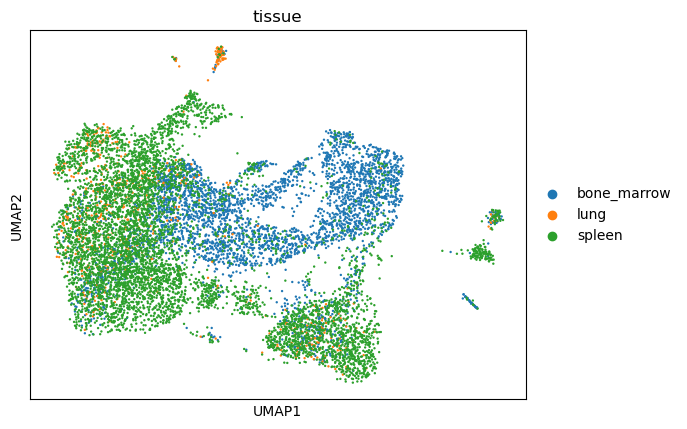

In [9]:
sc.pl.umap(adata, color="tissue")

In [10]:
genesets = {
    "Early pre-cDCs": [
        "Mki67",
        "Kif11",
        "H2afx",
        "Cdk1",
        "Shcbp1",
        "Birc5",
        "Nusap1",
        "Cdca3",
        "Ube2c",
        "Cenpe",
        "Aurka",
        "Ckap2l",
        "Racgap1",
        "Ccna2",
        "Kif22",
        "Hist1h2ae",
        "Hist1h1b",
        "Fbxo5",
        "Spc24",
        "Mad2l1",
        "Aurkb",
        "Bub3",
        "Ptprcap",
        "Top2a",
        "Hist1h4d",
        "Tk1",
    ],
    "Late pre-cDCs": [
        "H2-Aa",
        "H2-Ab1",
        "H2-DMa",
        "H2-DMb1",
        "H2-DMb2",
        "H2-Eb1",
        "H2-Eb2",
        "H2-Oa",
        "H2-Ob",
        "Cd40",
        "Cd74",
        "Cd80",
        "Cd86",
    ],
    "Proliferation": [
        "Anln",
        "Aspm",
        "Aurka",
        "Aurkb",
        "Birc5",
        "Bub1",
        "Bub1b",
        "Knl1",
        "Ccna2",
        "Ccnb1",
        "Ccnb2",
        "Ccne2",
        "Cdc20",
        "Cdc6",
        "Cdca2",
        "Cdca3",
        "Cdca5",
        "Cdca7",
        "Cdca8",
        "Cdk1",
        "Cdkn3",
        "Cdt1",
        "Cenpa",
        "Cenpe",
        "Cenpf",
        "Cenpl",
        "Cep55",
        "Cks1b",
        "Depdc1a",
        "Depdc1b",
        "Dlgap5",
        "Donson",
        "Dtl",
        "E2f8",
        "Ect2",
        "Ezh2",
        "Fam72a",
        "Fanci",
        "Fbxo5",
        "Foxm1",
        "Gins1",
        "Gins2",
        "Gmnn",
        "Hjurp",
        "Hmgb3",
        "Hmmr",
        "Pclaf",
        "Kif11",
        "Kif14",
        "Kif15",
        "Kif18b",
        "Kif20a",
        "Kif2c",
        "Kif4",
        "Mad2l1",
        "Mcm10",
        "Mcm2",
        "Mcm4",
        "Mcm6",
        "Melk",
        "Mki67",
        "Mnd1",
        "Mtfr2",
        "Ncapg",
        "Ncapg2",
        "Ndc80",
        "Nek2",
        "Nuf2",
        "Nusap1",
        "Oip5",
        "Parpbp",
        "Pbk",
        "Pcna",
        "Plk4",
        "Pole2",
        "Polq",
        "Pttg1",
        "Racgap1",
        "Rad51",
        "Rad51ap1",
        "Rrm1",
        "Rrm2",
        "Shcbp1",
        "Ska1",
        "Smc2",
        "Spc25",
        "Stil",
        "Stmn1",
        "Tcf19",
        "Tk1",
        "Top2a",
        "Tpx2",
        "Trip13",
        "Ttk",
        "Tyms",
        "Ube2c",
        "Uhrf1",
        "Zwilch",
    ],
    "pre-cDC1s": [
        "Id2",
        "Ifi205",
        "Ppt1",
        "Ncf4",
        "Xcr1",
        "Batf3",
        "Cst3",
        "Havcr2",
        "Wdfy4",
        "Fgl2",
        "H2-Ab1",
        "Ckb",
        "Aif1",
        "H2-Eb1",
        "Atpif1",
        "Irf8",
        "Cd83",
        "Kit",
        "Cd24a",
        "H2-Aa",
        "Cd74",
        "Cd9",
        "Gatm",
        "P2ry14",
        "Plbd1",
        "Psmb9",
        "St3gal5",
        "Pbx1",
        "Psmb8",
        "Tlr3",
        "Sh3bp1",
        "Pdia5",
        "Psme1",
        "Glrx",
        "Snx22",
        "Mctp1",
        "Pglyrp1",
    ],
    "pre-cDC2s": [
        "Itgam",
        "Cd14",
        "Sirpa",
        "Cd209a",
        "Cd209d",
        "Ly6c2",
        "S100a4",
        "Ifitm3",
        "Ifitm2",
        "Cx3cr1",
        "Ifitm6",
        "Ms4a6b",
        "Smpdl3a",
        "Csf1r",
        "Tmem176a",
        "Ifi27l2a",
        "Runx2",
        "Upb1",
        "Lifr",
        "Lair1",
        "Apod",
        "Tcf4",
        "Bst2",
        "Siglech",
        "Atp1b1",
        "Clec10a",
        "Irf4",
        "Cd7",
        "S100a6",
        "Fcer1g",
        "Zeb2",
        "Klf4",
        "Tyrobp",
        "Bcl11a",
        "Emp3",
        "Ctsa",
        "Trappc5",
    ],
    "cDC2a": [
        "Tbc1d4",
        "Ppp1r14a",
        "Pglyrp1",
        "Ifitm1",
        "Mdh2",
        "Specc1",
        "Siglecg",
        "Ccnd1",
        "S100a11",
        "Dtx1",
        "Cyp4f16",
        "Ppp1r11",
        "Pkib",
        "H2-DMb2",
        "Cdv3",
        "Sept1",
        "Mef2c",
        "Tctex1d2",
        "Rras2",
        "Wdfy4",
        "M6pr",
        "Fgl2",
        "Clec4a4",
        "Fam107b",
        "Rgs2",
        "Asb2",
        "Sp140",
        "Gm14548",
        "Actr1b",
        "Hmgn3",
        "Vasp",
        "Cd300lf",
        "Ifi27",
        "Phc1",
        "Slc38a1",
        "Gm6133",
        "Kit",
        "Cyld",
        "Churc1",
        "Uba52",
        "Cnot6l",
        "Slc16a6",
        "Map3k14",
        "Cdkn2c",
        "Txnip",
        "Irf4",
        "Smarca2",
    ],
    "cDC2b": [
        "Ltb4r1",
        "Trib1",
        "Ccr2",
        "Ppt2",
        "Clec10a",
        "Fcer1g",
        "Pot1b",
        "Pid1",
        "Clec4a1",
        "Got1",
        "Igsf6",
        "AB124611",
        "Creg1",
        "Adgre4",
        "Tpd52",
        "Ypel3",
        "Selenop",
        "Irf8",
        "Khk",
        "Il1rn",
        "Mpeg1",
        "Shisa5",
        "Lilrb4a",
        "Cmtm7",
        "Cybb",
        "Aldoa",
        "BC028528",
        "Fcgr2b",
        "Selplg",
        "Cd14",
        "Clec4b1",
        "Hpgd",
        "Mcub",
        "Ctss",
        "Cst3",
        "Clec4a3",
        "Lgmn",
        "Klrk1",
        "Clec12a",
        "Nfe2l2",
        "Csf1r",
        "H2-DMsb1",
        "Arl5c",
        "Lamp1",
        "Ccl9",
        "Ccl6",
        "Mcemp1",
        "Npc2",
        "Cd209a",
        "Cxcl16",
        "Aif1",
        "Wfdc17",
        "Tmem176b",
        "Psap",
        "Tmem176a",
        "Lyz2",
    ],
}

In [11]:
for gs in genesets:
    sc.tl.score_genes(adata, gene_list=genesets[gs], score_name=gs)

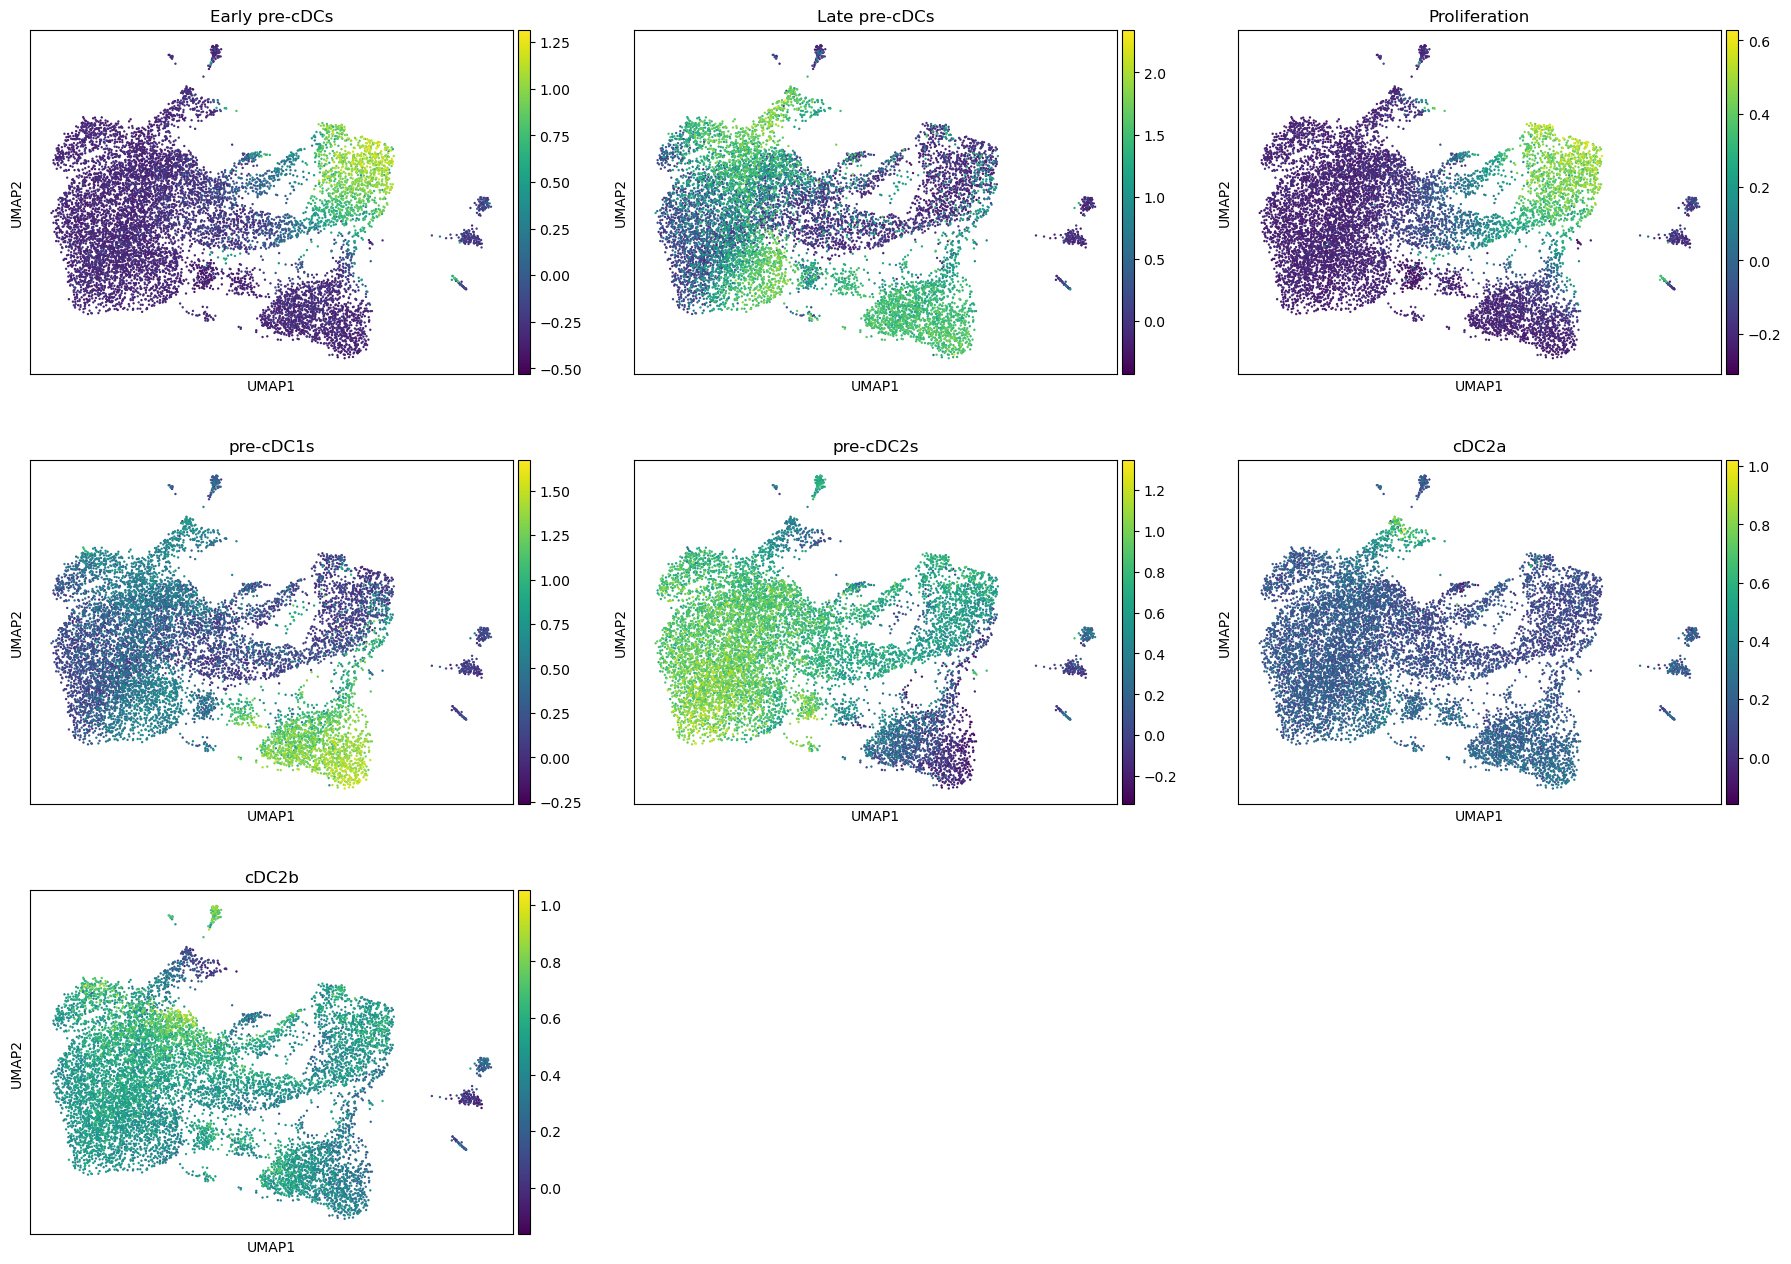

In [12]:
sc.pl.umap(adata, color=genesets, ncols=3)

In [13]:
sc.tl.leiden(adata)

/var/folders/_r/j_8_fj3x28n2th3ch0ckn9c40000gt/T/ipykernel_96052/3467744858.py:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata)


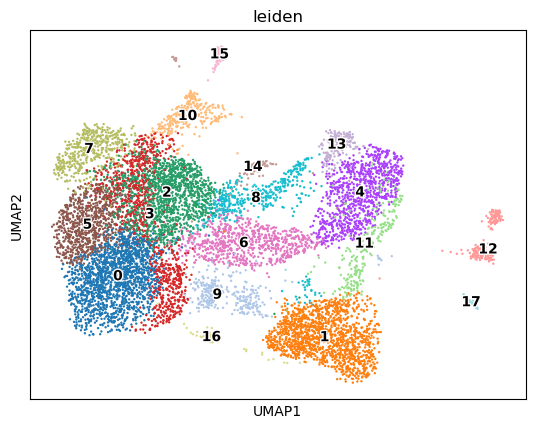

In [14]:
sc.pl.umap(adata, color=["leiden"], legend_loc="on data", legend_fontoutline=2)

In [16]:
# ok cluster 10 is cDC2a and cluster 2 is cDC2b (based on the signatures)
adata.write("minutti_GSE217328_mouse.h5ad", compression="gzip")

In [46]:
# convert to human genes
import mousipy

humanized_adata = mousipy.translate(adata.raw.to_adata())
humanized_adata

100%|██████████| 31055/31055 [00:37<00:00, 835.25it/s] 


Found direct orthologs for 16624 genes.
Found multiple orthologs for 773 genes.
Found no orthologs for 10560 genes.
Found no index in biomart for 3098 genes.


  0%|          | 0/773 [00:00<?, ?it/s]/opt/homebrew/Caskroom/miniforge/base/envs/dandelion/lib/python3.11/site-packages/mousipy/mousipy.py:229: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  var = pd.concat([var, new_row])
/opt/homebrew/Caskroom/miniforge/base/envs/dandelion/lib/python3.11/site-packages/mousipy/mousipy.py:229: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  var = pd.concat([var, new_row])
/opt/homebrew/Caskroom/miniforge/base/envs/dandelion/lib/python3.11/site-packages/mousipy/mou

AnnData object with n_obs × n_vars = 10253 × 19513
    obs: 'tissue', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'Early pre-cDCs', 'Late pre-cDCs', 'Proliferation', 'pre-cDC1s', 'pre-cDC2s', 'cDC2a', 'cDC2b', 'leiden'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'original_gene_symbol'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'tissue_colors', 'leiden', 'leiden_colors', 'rank_genes_groups', 'dendrogram_leiden'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'

In [58]:
humanized_adata.var

,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,highly_variable,means,dispersions,dispersions_norm,original_gene_symbol
XKR4,False,0,0.000000,100.000000,0.0,False,1.000000e-12,NaN,NaN,Xkr4
RP1,False,0,0.000000,100.000000,0.0,False,1.000000e-12,NaN,NaN,Rp1
SOX17,False,1,0.000082,99.991759,1.0,False,1.000000e-12,NaN,NaN,Sox17
MRPL15,False,6035,0.842439,50.267820,10223.0,False,6.314785e-01,0.233177,-0.682554,Mrpl15
LYPLA1,False,3189,0.327730,73.720643,3977.0,False,3.044074e-01,0.387816,-0.262044,Lypla1
...,...,...,...,...,...,...,...,...,...,...
20274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import pandas as pd

# just fill in the missing information with False or 0 as it's not important for the analysis but needed to save
humanized_adata.var.loc[pd.isnull(humanized_adata.var["mt"]), "mt"] = False
humanized_adata.var.loc[
    pd.isnull(humanized_adata.var["n_cells_by_counts"]), "n_cells_by_counts"
] = 0
humanized_adata.var.loc[
    pd.isnull(humanized_adata.var["mean_counts"]), "mean_counts"
] = 0
humanized_adata.var.loc[
    pd.isnull(humanized_adata.var["pct_dropout_by_counts"]), "pct_dropout_by_counts"
] = 0
humanized_adata.var.loc[
    pd.isnull(humanized_adata.var["total_counts"]), "total_counts"
] = 0
humanized_adata.var.loc[
    pd.isnull(humanized_adata.var["highly_variable"]), "highly_variable"
] = False
humanized_adata.var.loc[pd.isnull(humanized_adata.var["means"]), "means"] = 0
humanized_adata.var.loc[
    pd.isnull(humanized_adata.var["dispersions"]), "dispersions"
] = 0
humanized_adata.var.loc[
    pd.isnull(humanized_adata.var["dispersions_norm"]), "dispersions_norm"
] = 0

In [79]:
humanized_adata.var["mt"] = humanized_adata.var["mt"].astype(bool)
humanized_adata.var["n_cells_by_counts"] = humanized_adata.var[
    "n_cells_by_counts"
].astype(int)
humanized_adata.var["mean_counts"] = humanized_adata.var["mean_counts"].astype(float)
humanized_adata.var["pct_dropout_by_counts"] = humanized_adata.var[
    "pct_dropout_by_counts"
].astype(float)
humanized_adata.var["total_counts"] = humanized_adata.var["total_counts"].astype(float)
humanized_adata.var["highly_variable"] = humanized_adata.var["highly_variable"].astype(
    bool
)
humanized_adata.var["means"] = humanized_adata.var["means"].astype(float)
humanized_adata.var["dispersions"] = humanized_adata.var["dispersions"].astype(float)
humanized_adata.var["dispersions_norm"] = humanized_adata.var[
    "dispersions_norm"
].astype(float)

In [80]:
humanized_adata.raw = humanized_adata.copy()

In [48]:
cDC2_signatures = {
    "cDC2a": [
        "CLEC4A",
        "LTB",
        "IL22RA2",
        "CD3E",
    ],
    "cDC2B": [
        "CEBPD",
        "IL1R2",
        "FCER1A",
        "FCN1",
        "IL1B",
        # "CD1C",
        "CEBPB",
        "CLEC10A",
    ],
}

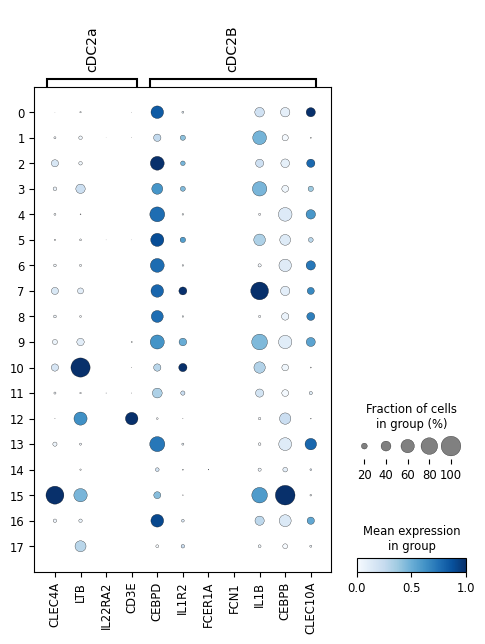

In [49]:
sc.pl.dotplot(
    humanized_adata,
    cDC2_signatures,
    groupby="leiden",
    standard_scale="var",
    color_map="Blues",
)

In [50]:
genesets.keys()

dict_keys(['Early pre-cDCs', 'Late pre-cDCs', 'Proliferation', 'pre-cDC1s', 'pre-cDC2s', 'cDC2a', 'cDC2b'])

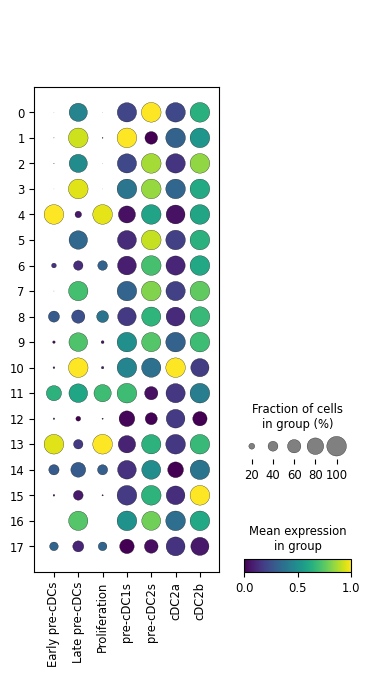

In [51]:
sc.pl.dotplot(
    humanized_adata,
    list(genesets.keys()),
    groupby="leiden",
    standard_scale="var",
    color_map="viridis",
)

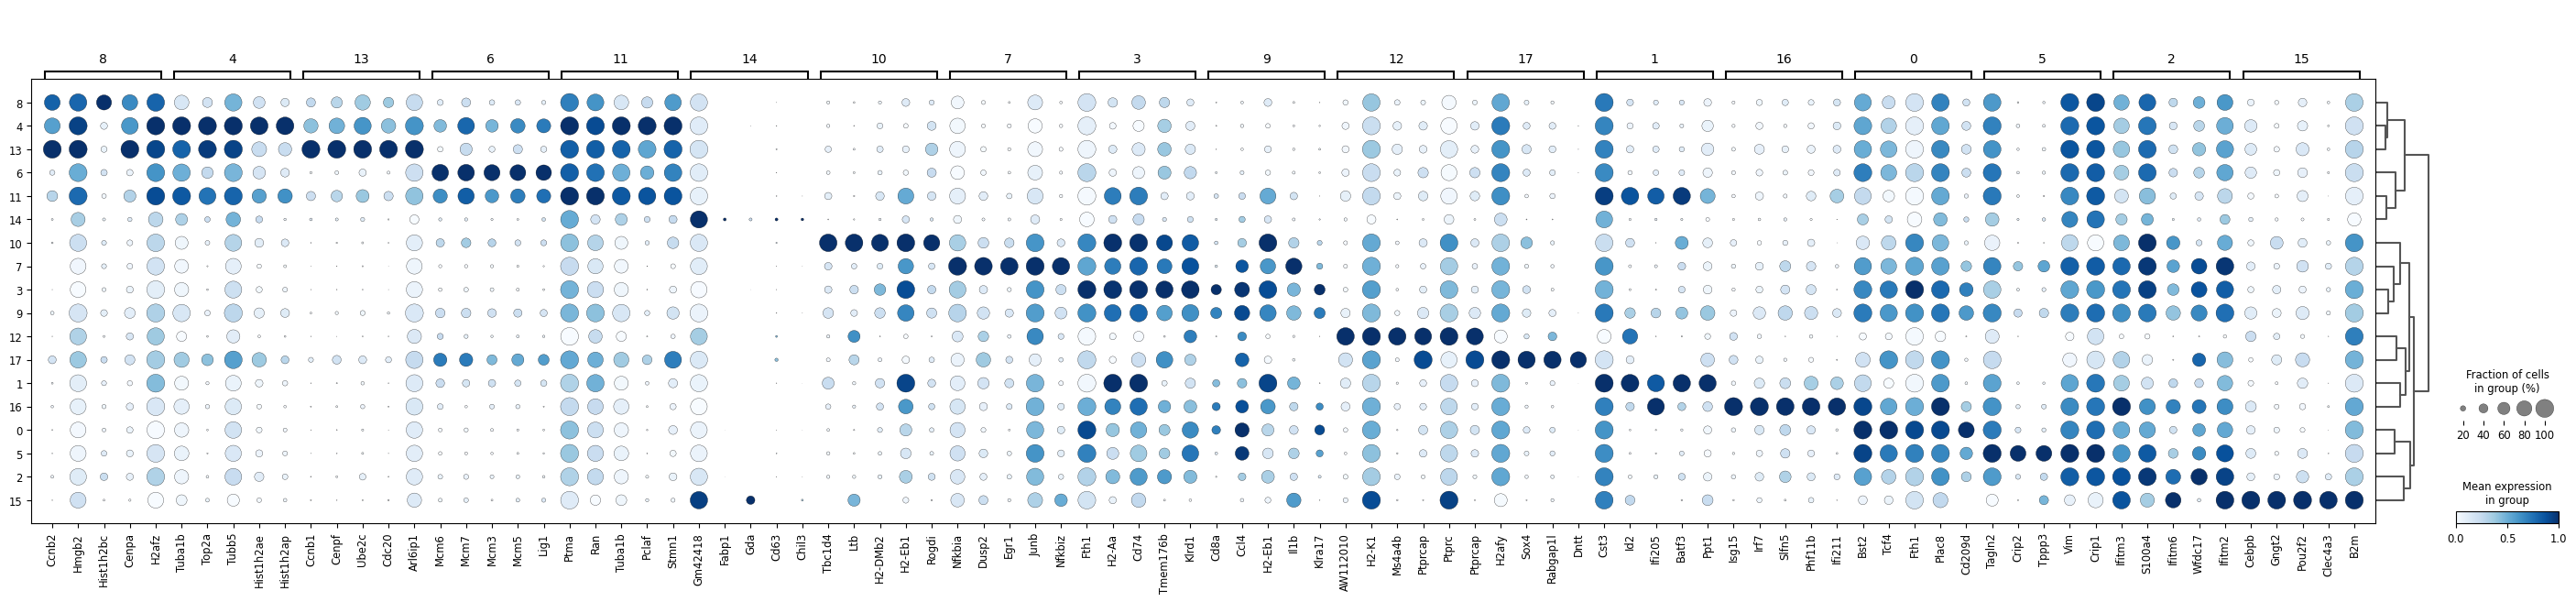

In [52]:
# sc.tl.rank_genes_groups(adata, "leiden", method="wilcoxon")
sc.pl.rank_genes_groups_dotplot(
    adata, n_genes=5, min_logfoldchange=1, standard_scale="var", color_map="Blues"
)

In [81]:
humanized_adata.write("minutti_GSE217328_humanized.h5ad", compression="gzip")